In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('dataset/train',
                                                target_size=(128, 128),
                                                batch_size=32,
                                                class_mode='categorical')

test_data = test_datagen.flow_from_directory('dataset/test',
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='categorical')

val_data = test_datagen.flow_from_directory('dataset/val',
                                             target_size=(128, 128),
                                             batch_size=32,
                                             class_mode='categorical')

Found 8791 images belonging to 31 classes.
Found 1760 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.


In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(31, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(train_data,
                    epochs=20,
                    validation_data=val_data)

c:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 911ms/step - accuracy: 0.1230 - loss: 3.3004

c:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


275/275 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.1231 - loss: 3.3000 - val_accuracy: 0.2334 - val_loss: 2.8593
Epoch 2/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 209s 760ms/step - accuracy: 0.2413 - loss: 2.8493 - val_accuracy: 0.3166 - val_loss: 2.4834
Epoch 3/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 254s 924ms/step - accuracy: 0.3028 - loss: 2.4928 - val_accuracy: 0.3857 - val_loss: 2.2025
Epoch 4/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 232s 845ms/step - accuracy: 0.3538 - loss: 2.2416 - val_accuracy: 0.4773 - val_loss: 1.8261
Epoch 5/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 208s 757ms/step - accuracy: 0.4183 - loss: 2.0513 - val_accuracy: 0.4973 - val_loss: 1.7217
Epoch 6/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 215s 781ms/step - accuracy: 0.4546 - loss: 1.9130 - val_accuracy: 0.5703 - val_loss: 1.4780
Epoch 7/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 229s 834ms/step - accuracy: 0.5027 - loss: 1.7534 - val_accuracy: 0.5991 - val_loss: 1.3800
Epoch 8/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 219s 796ms/step - accuracy: 0.5204 - loss: 1.6576 

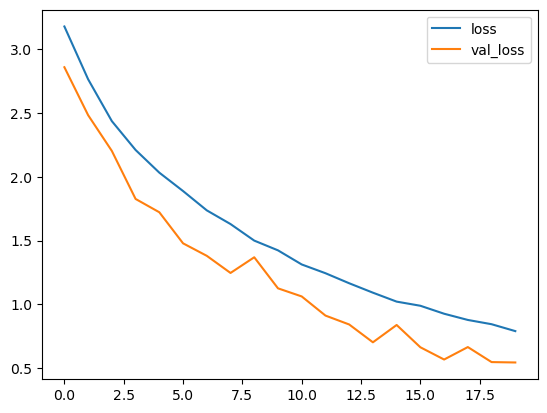

In [5]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

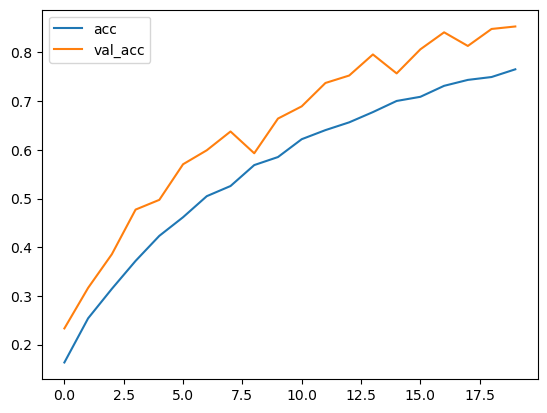

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [11]:


results = model.evaluate(test_data, verbose=0)


print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))



    Test Loss: 0.64851
Test Accuracy: 82.90%
